In [8]:
import pandas as pd
import yfinance as yf

def get_data(stock):
    #get historical stock data 
    YEARS = 3
    WEEKS = 1
    start = (pd.Timestamp.now() - pd.DateOffset(weeks=WEEKS)).strftime('%Y-%m-%d')
    END = pd.Timestamp.now().strftime('%Y-%m-%d')
    stock_data = yf.download(stock, start=start, end=END)
    #stock_data['Date'] = stock_data.index
    stock_data.reset_index(inplace=True)
    #stock_data.reset_index(inplace=True, drop=False)
    # Calculate daily returns
    stock_data['Daily Return'] = stock_data['Close'].pct_change()
    
    
    # Separate gains and losses
    stock_data['Gain'] = stock_data['Daily Return'].apply(lambda x: x if x > 0 else 0)
    stock_data['Loss'] = stock_data['Daily Return'].apply(lambda x: -x if x < 0 else 0)
    
    # Calculate average gain and loss
    window = 14
    stock_data['Avg Gain'] = stock_data['Gain'].rolling(window=window).mean()
    stock_data['Avg Loss'] = stock_data['Loss'].rolling(window=window).mean()
    
    # Calculate RS and RSI
    stock_data['RS'] = stock_data['Avg Gain'] / stock_data['Avg Loss']
    stock_data['RSI'] = 100 - (100 / (1 + stock_data['RS']))
    
    # Calculate the 26-day moving average of the closing prices
    stock_data['MA_26_Day'] = stock_data['Close'].rolling(window=26).mean()

    # Return the final DataFrame
    return stock_data[['Date', 'Low','High', 'Close', 'MA_26_Day', 'RSI', 'Volume']]

print(get_data('TSM'))

[*********************100%%**********************]  1 of 1 completed
        Date         Low        High       Close  MA_26_Day  RSI    Volume
0 2024-03-18  136.610001  141.539993  136.639999        NaN  NaN  14732900
1 2024-03-19  133.029999  136.270004  134.869995        NaN  NaN  17341100
2 2024-03-20  135.009995  137.309998  136.750000        NaN  NaN  12750200
3 2024-03-21  139.039993  142.600006  139.449997        NaN  NaN  17809400
4 2024-03-22  139.110001  141.339996  140.539993        NaN  NaN   9935200


In [12]:
stock = 'PANW'
data = get_data(stock)
high = data['High']
low = data['Low']

def calculate_fibonacci_levels(high, low):
    fib_ratios = [0.236, 0.382, 0.5, 0.618, 0.786]
    return {f"{int(ratio * 100)}%": high - (high - low) * ratio for ratio in fib_ratios}

fib_levels = calculate_fibonacci_levels(high, low)
#print("Fibonacci Levels:", fib_levels)
print(fib_levels)

def determine_entry_position(fib_levels):
    # Example: Choosing 61.8% level as entry, this can be adjusted
    return fib_levels["61%"]

entry_price = determine_entry_position(fib_levels)

def calculate_stop_loss_and_target(entry, fib_levels, fib_ratios):
    # Assuming stop loss just below the next level down (50% for this example) and target profit at 23.6%
    stop_loss = fib_levels["50%"] - (entry - fib_levels["50%"]) * 0.05 # 5% below the 50% level for buffer
    target_profit = entry + (entry - fib_levels["78%"]) # Targeting just above the entry level for profit
    return stop_loss, target_profit

stop_loss, target_profit = calculate_stop_loss_and_target(entry_price, fib_levels, [0.236, 0.382, 0.5, 0.618, 0.786])
print("Stop Loss:", stop_loss)
print("Target Profit:", target_profit)
print("Suggested Entry Position:", entry_price)

[*********************100%%**********************]  1 of 1 completed
{'23%': 0    285.343802
1    282.348768
2    282.433798
3    288.117493
4    289.632131
dtype: float64, '38%': 0    284.548100
1    281.240624
2    281.638097
3    286.866272
4    288.853948
dtype: float64, '50%': 0    283.904999
1    280.345001
2    280.994995
3    285.855011
4    288.225006
dtype: float64, '61%': 0    283.261897
1    279.449378
2    280.351894
3    284.843750
4    287.596064
dtype: float64, '78%': 0    282.346295
1    278.174254
2    279.436292
3    283.403989
4    286.700621
dtype: float64}
Stop Loss: 0    283.937154
1    280.389782
2    281.027150
3    285.905574
4    288.256453
dtype: float64
Target Profit: 0    284.177499
1    280.724503
2    281.267496
3    286.283511
4    288.491507
dtype: float64
Suggested Entry Position: 0    283.261897
1    279.449378
2    280.351894
3    284.843750
4    287.596064
dtype: float64


[*********************100%%**********************]  1 of 1 completed


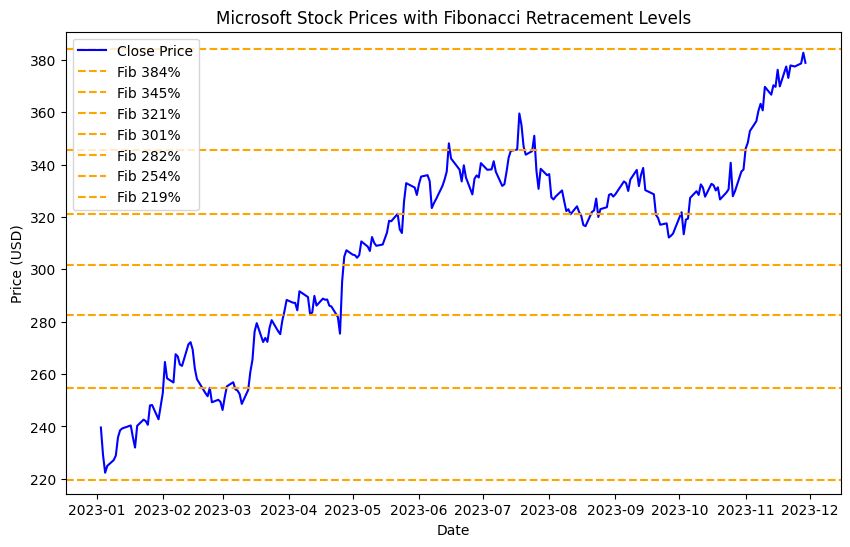

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

def fetch_stock_prices(symbol, start_date, end_date):
    try:
        # Fetch historical data from Yahoo Finance
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def calculate_fibonacci_levels(high, low):
    # Calculate Fibonacci retracement levels
    levels = [0, 23.6, 38.2, 50, 61.8, 78.6, 100]

    # Calculate price range
    price_range = high - low

    # Calculate retracement levels
    retracement_levels = [high - level / 100.0 * price_range for level in levels]

    return retracement_levels

def plot_stock_prices(stock_data, retracement_levels):
    # Plotting the closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label='Close Price', color='blue')

    # Plotting Fibonacci retracement levels
    for level in retracement_levels:
        plt.axhline(y=level, linestyle='--', color='orange', label=f'Fib {int(level)}%')

    plt.title('Microsoft Stock Prices with Fibonacci Retracement Levels')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Define the stock symbol (Microsoft)
    stock_symbol = 'MSFT'

    # Define the time period for which you want historical data
    start_date = '2023-01-01'
    end_date = '2023-11-30'

    # Fetch historical stock prices
    msft_data = fetch_stock_prices(stock_symbol, start_date, end_date)

    # If data is successfully fetched, calculate and plot Fibonacci retracement levels
    if msft_data is not None:
        # Calculate Fibonacci retracement levels using the highest and lowest prices
        high_price = np.max(msft_data['High'])
        low_price = np.min(msft_data['Low'])
        retracement_levels = calculate_fibonacci_levels(high_price, low_price)

        # Plot stock prices with Fibonacci retracement levels
        plot_stock_prices(msft_data, retracement_levels)

        

[*********************100%%**********************]  1 of 1 completed


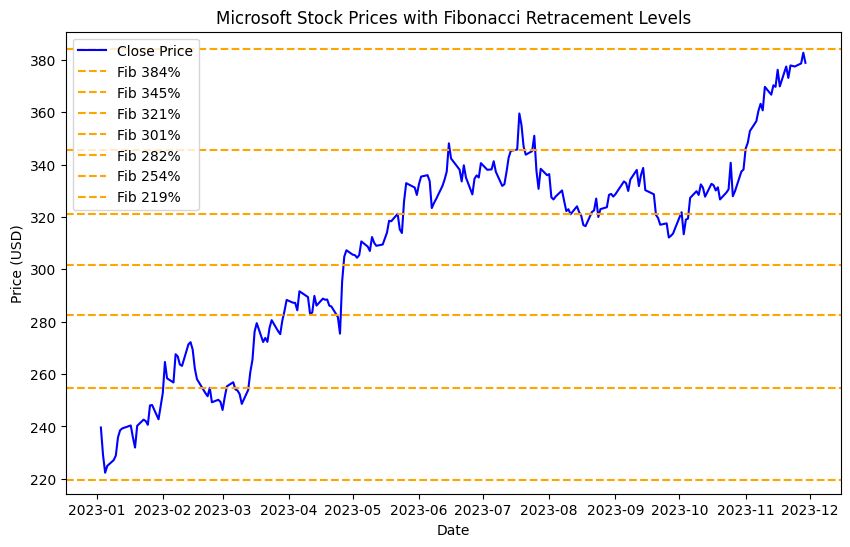

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

def fetch_stock_prices(symbol, start_date, end_date):
    try:
        # Fetch historical data from Yahoo Finance
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def calculate_fibonacci_levels(high, low):
    # Calculate Fibonacci retracement levels
    levels = [0, 23.6, 38.2, 50, 61.8, 78.6, 100]

    # Calculate price range
    price_range = high - low

    # Calculate retracement levels
    retracement_levels = [high - level / 100.0 * price_range for level in levels]

    return retracement_levels

def plot_stock_prices(stock_data, retracement_levels):
    # Plotting the closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label='Close Price', color='blue')

    # Plotting Fibonacci retracement levels
    for level in retracement_levels:
        plt.axhline(y=level, linestyle='--', color='orange', label=f'Fib {int(level)}%')

    plt.title('Microsoft Stock Prices with Fibonacci Retracement Levels')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Define the stock symbol (Microsoft)
    stock_symbol = 'MSFT'

    # Define the time period for which you want historical data
    start_date = '2023-01-01'
    end_date = '2023-11-30'

    # Fetch historical stock prices
    msft_data = fetch_stock_prices(stock_symbol, start_date, end_date)

    # If data is successfully fetched, calculate and plot Fibonacci retracement levels
    if msft_data is not None:
        # Calculate Fibonacci retracement levels using the highest and lowest prices
        high_price = np.max(msft_data['High'])
        low_price = np.min(msft_data['Low'])
        retracement_levels = calculate_fibonacci_levels(high_price, low_price)

        # Plot stock prices with Fibonacci retracement levels
        plot_stock_prices(msft_data, retracement_levels)


[*********************100%%**********************]  1 of 1 completed
Entry Level: 282.3608991088867
Stop Loss Level: 254.64930218505862
Target Profit Level: 321.28909478759766


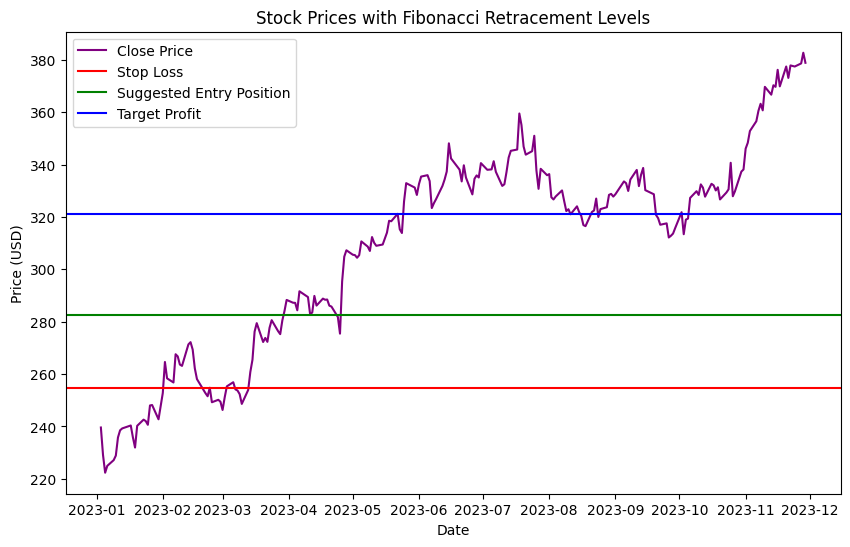

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

def fetch_stock_prices(symbol, start_date, end_date):
    try:
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def calculate_fibonacci_levels(high, low):
    levels = [0, 23.6, 38.2, 50, 61.8, 78.6, 100]
    price_range = high - low
    retracement_levels = {level: high - (level / 100.0 * price_range) for level in levels}
    return retracement_levels

def determine_strategy_levels(retracement_levels):
    entry_level = retracement_levels[61.8]
    # Adjusting stop_loss_level to be below the entry level, considering risk tolerance
    stop_loss_level = retracement_levels[78.6]  # Setting stop loss below the entry level for safety
    target_profit_level = retracement_levels[38.2]  # Assuming a conservative target for profit
    return entry_level, stop_loss_level, target_profit_level

def plot_stock_prices(stock_data, retracement_levels, entry_level, stop_loss_level, target_profit_level):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label='Close Price', color='purple')
    for level, price in retracement_levels.items():
        plt.title('Stock Prices with Fibonacci Retracement Levels')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.axhline(y=stop_loss_level, color='r', linestyle='-', label='Stop Loss')
    plt.axhline(y=entry_level, color='g', linestyle='-', label='Suggested Entry Position')
    plt.axhline(y=target_profit_level, color='b', linestyle='-', label='Target Profit')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    stock_symbol = 'MSFT'
    start_date = '2023-01-01'
    end_date = '2023-11-30'
    msft_data = fetch_stock_prices(stock_symbol, start_date, end_date)

    if msft_data is not None:
        high_price = np.max(msft_data['High'])
        low_price = np.min(msft_data['Low'])
        retracement_levels = calculate_fibonacci_levels(high_price, low_price)
        entry_level, stop_loss_level, target_profit_level = determine_strategy_levels(retracement_levels)

        print(f"Entry Level: {entry_level}")
        print(f"Stop Loss Level: {stop_loss_level}")
        print(f"Target Profit Level: {target_profit_level}")

        plot_stock_prices(msft_data, retracement_levels, entry_level, stop_loss_level, target_profit_level)

